In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from pandas_profiling import ProfileReport
from sklearn.impute import KNNImputer,SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge,Lasso ,RidgeCV,LassoCV , ElasticNet , ElasticNetCV,LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm 

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('Admission_Prediction.csv')

In [3]:
df

Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR  CGPA  \
0             1      337.0        118.0                4.0  4.5  4.5  9.65   
1             2      324.0        107.0                4.0  4.0  4.5  8.87   
2             3        NaN        104.0                3.0  3.0  3.5  8.00   
3             4      322.0        110.0                3.0  3.5  2.5  8.67   
4             5      314.0        103.0                2.0  2.0  3.0  8.21   
..          ...        ...          ...                ...  ...  ...   ...   
495         496      332.0        108.0                5.0  4.5  4.0  9.02   
496         497      337.0        117.0                5.0  5.0  5.0  9.87   
497         498      330.0        120.0                5.0  4.5  5.0  9.56   
498         499      312.0        103.0                4.0  4.0  5.0  8.43   
499         500      327.0        113.0                4.0  4.5  4.5  9.04   

     Research  Chance of Admit  
0           1             0.92  
1           1             0.76  
2           1             0.72  
3           1             0.80  
4           0             0.65  
..        ...              ...  
495         1             0.87  
496         1             0.96  
497         1             0.93  
498         0             0.73  
499         0             0.84  

[500 rows x 9 columns]

In [4]:
ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [6]:
pf = ProfileReport(df)

In [7]:
pf.to_file('test.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [8]:
df

Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR  CGPA  \
0             1      337.0        118.0                4.0  4.5  4.5  9.65   
1             2      324.0        107.0                4.0  4.0  4.5  8.87   
2             3        NaN        104.0                3.0  3.0  3.5  8.00   
3             4      322.0        110.0                3.0  3.5  2.5  8.67   
4             5      314.0        103.0                2.0  2.0  3.0  8.21   
..          ...        ...          ...                ...  ...  ...   ...   
495         496      332.0        108.0                5.0  4.5  4.0  9.02   
496         497      337.0        117.0                5.0  5.0  5.0  9.87   
497         498      330.0        120.0                5.0  4.5  5.0  9.56   
498         499      312.0        103.0                4.0  4.0  5.0  8.43   
499         500      327.0        113.0                4.0  4.5  4.5  9.04   

     Research  Chance of Admit  
0           1             0.92  
1           1             0.76  
2           1             0.72  
3           1             0.80  
4           0             0.65  
..        ...              ...  
495         1             0.87  
496         1             0.96  
497         1             0.93  
498         0             0.73  
499         0             0.84  

[500 rows x 9 columns]

In [13]:
# Dropping Serial No. column

df.drop(columns=['Serial No.'],inplace=True)

In [21]:
# making a function to plot box and distribution plot

def outlierplot(dataframe,feature):
    
    fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(15, 5))
    sns.boxplot(x=dataframe[feature],ax=ax1)
    sns.distplot(x=dataframe[feature] ,ax=ax2,hist=False)
    plt.show()

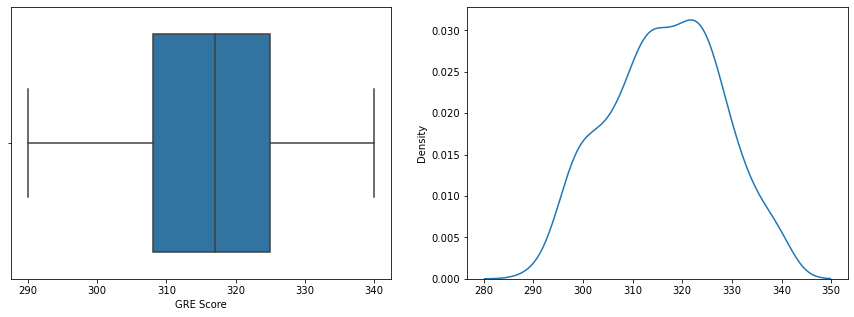

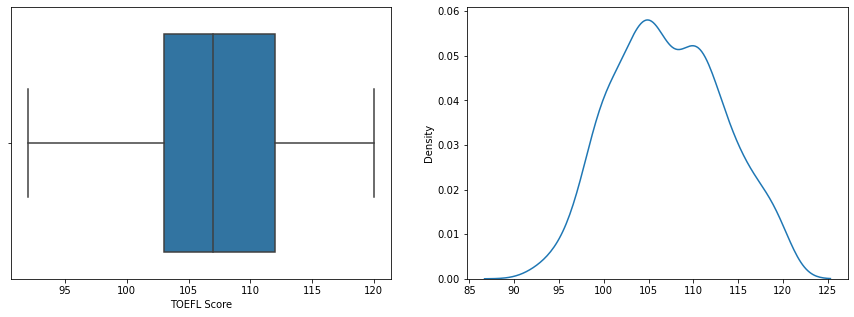

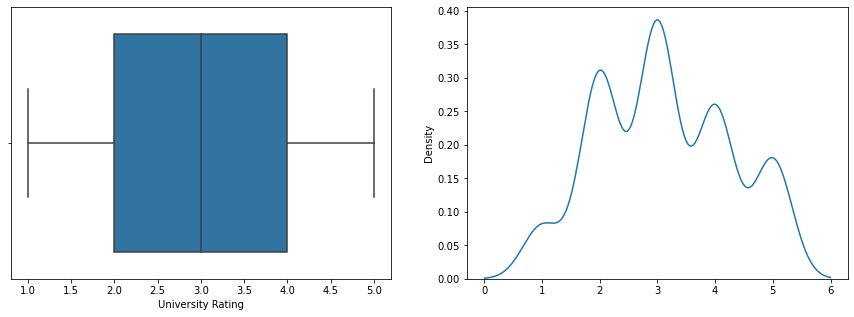

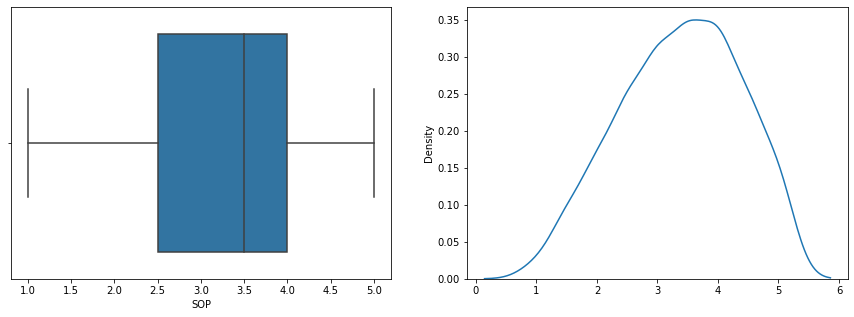

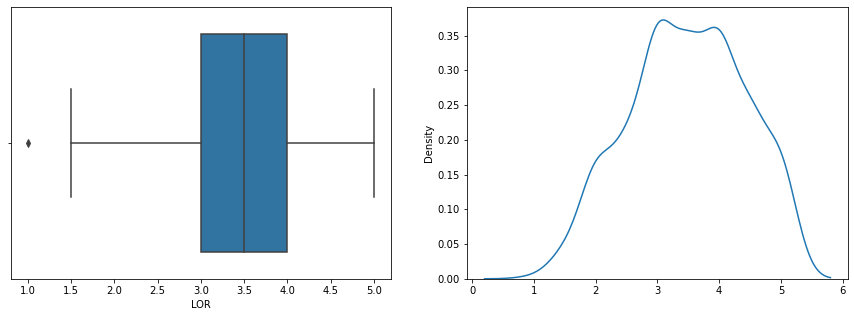

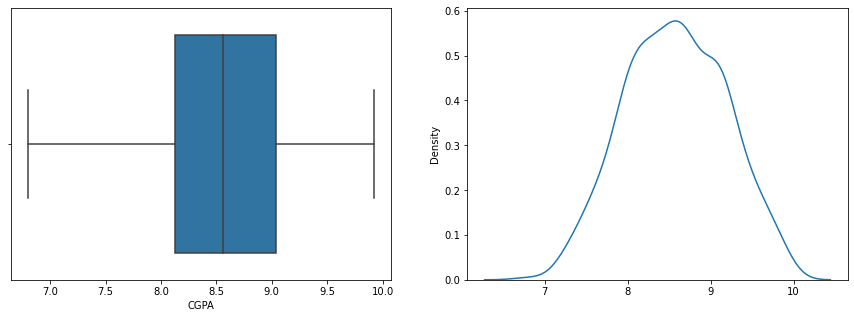

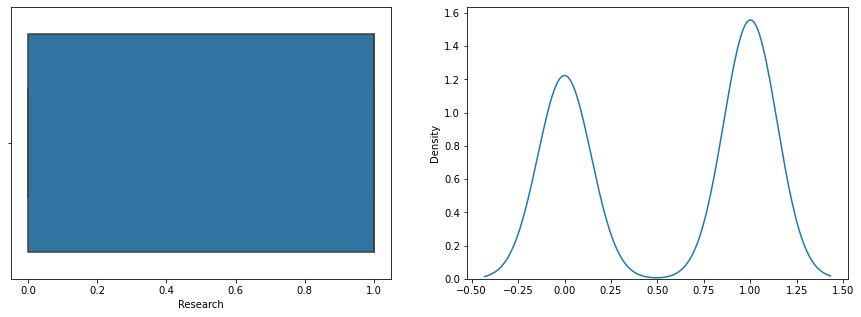

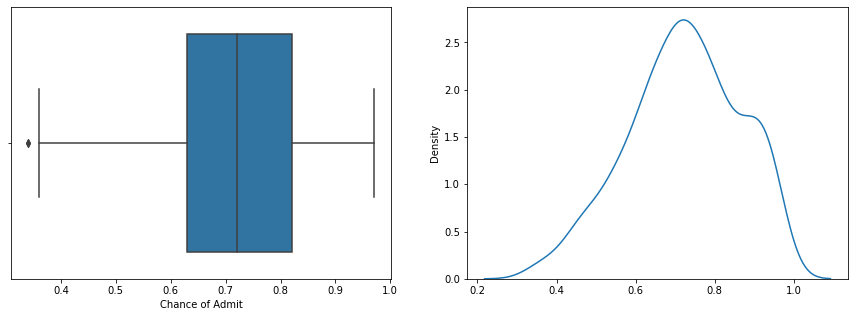

In [24]:
for i in df.columns:
    outlierplot(df,i)

In [11]:
# Checking for null values

df.isnull().mean()*100

Serial No.           0.0
GRE Score            3.0
TOEFL Score          2.0
University Rating    3.0
SOP                  0.0
LOR                  0.0
CGPA                 0.0
Research             0.0
Chance of Admit      0.0
dtype: float64

## KNN imputer for imputing missing values

In [10]:
from sklearn.impute import KNNImputer,SimpleImputer

In [25]:
for i in df.columns:
    knn = KNNImputer(n_neighbors=3,weights='distance')

    df[i] = knn.fit_transform(np.array(df[i]).reshape(-1,1))

In [26]:
df.describe()

GRE Score  TOEFL Score  University Rating         SOP        LOR  \
count  500.000000   500.000000         500.000000  500.000000  500.00000   
mean   316.558763   107.187755           3.121649    3.374000    3.48400   
std     11.103952     6.051338           1.128802    0.991004    0.92545   
min    290.000000    92.000000           1.000000    1.000000    1.00000   
25%    309.000000   103.000000           2.000000    2.500000    3.00000   
50%    316.558763   107.000000           3.000000    3.500000    3.50000   
75%    324.000000   112.000000           4.000000    4.000000    4.00000   
max    340.000000   120.000000           5.000000    5.000000    5.00000   

             CGPA    Research  Chance of Admit  
count  500.000000  500.000000        500.00000  
mean     8.576440    0.560000          0.72174  
std      0.604813    0.496884          0.14114  
min      6.800000    0.000000          0.34000  
25%      8.127500    0.000000          0.63000  
50%      8.560000    1.000000          0.72000  
75%      9.040000    1.000000          0.82000  
max      9.920000    1.000000          0.97000

In [27]:
df.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [28]:
df

GRE Score  TOEFL Score  University Rating  SOP  LOR  CGPA  Research  \
0    337.000000        118.0                4.0  4.5  4.5  9.65       1.0   
1    324.000000        107.0                4.0  4.0  4.5  8.87       1.0   
2    316.558763        104.0                3.0  3.0  3.5  8.00       1.0   
3    322.000000        110.0                3.0  3.5  2.5  8.67       1.0   
4    314.000000        103.0                2.0  2.0  3.0  8.21       0.0   
..          ...          ...                ...  ...  ...   ...       ...   
495  332.000000        108.0                5.0  4.5  4.0  9.02       1.0   
496  337.000000        117.0                5.0  5.0  5.0  9.87       1.0   
497  330.000000        120.0                5.0  4.5  5.0  9.56       1.0   
498  312.000000        103.0                4.0  4.0  5.0  8.43       0.0   
499  327.000000        113.0                4.0  4.5  4.5  9.04       0.0   

     Chance of Admit  
0               0.92  
1               0.76  
2               0.72  
3               0.80  
4               0.65  
..               ...  
495             0.87  
496             0.96  
497             0.93  
498             0.73  
499             0.84  

[500 rows x 8 columns]

In [29]:
y = df['Chance of Admit']

In [30]:
x = df.drop(columns=['Chance of Admit'])

In [91]:
x_train, x_test, y_train,y_test = train_test_split(arr, y,test_size= 0.15,random_state = 100)

In [33]:
# using standard scaler for scaling the data

scaler = StandardScaler()

In [34]:
arr = scaler.fit_transform(x)

In [35]:
arr

array([[ 1.84274116e+00,  1.78854223e+00,  7.78905651e-01, ...,
         1.09894429e+00,  1.77680627e+00,  8.86405260e-01],
       [ 6.70814288e-01, -3.10581135e-02,  7.78905651e-01, ...,
         1.09894429e+00,  4.85859428e-01,  8.86405260e-01],
       [ 5.12433309e-15, -5.27312752e-01, -1.07876604e-01, ...,
         1.73062093e-02, -9.54042814e-01,  8.86405260e-01],
       ...,
       [ 1.21170361e+00,  2.11937866e+00,  1.66568791e+00, ...,
         1.63976333e+00,  1.62785086e+00,  8.86405260e-01],
       [-4.10964364e-01, -6.92730965e-01,  7.78905651e-01, ...,
         1.63976333e+00, -2.42366993e-01, -1.12815215e+00],
       [ 9.41258951e-01,  9.61451165e-01,  7.78905651e-01, ...,
         1.09894429e+00,  7.67219636e-01, -1.12815215e+00]])

In [36]:
df1 = pd.DataFrame(arr)

In [37]:
df1

0         1         2         3         4         5         6
0    1.842741e+00  1.788542  0.778906  1.137360  1.098944  1.776806  0.886405
1    6.708143e-01 -0.031058  0.778906  0.632315  1.098944  0.485859  0.886405
2    5.124333e-15 -0.527313 -0.107877 -0.377773  0.017306 -0.954043  0.886405
3    4.905178e-01  0.465197 -0.107877  0.127271 -1.064332  0.154847  0.886405
4   -2.306679e-01 -0.692731 -0.994659 -1.387862 -0.523513 -0.606480 -1.128152
..            ...       ...       ...       ...       ...       ...       ...
495  1.392000e+00  0.134360  1.665688  1.137360  0.558125  0.734118  0.886405
496  1.842741e+00  1.623124  1.665688  1.642404  1.639763  2.140919  0.886405
497  1.211704e+00  2.119379  1.665688  1.137360  1.639763  1.627851  0.886405
498 -4.109644e-01 -0.692731  0.778906  0.632315  1.639763 -0.242367 -1.128152
499  9.412590e-01  0.961451  0.778906  1.137360  1.098944  0.767220 -1.128152

[500 rows x 7 columns]

In [38]:
df1.describe()

0             1             2             3             4  \
count  5.000000e+02  5.000000e+02  5.000000e+02  5.000000e+02  5.000000e+02   
mean   4.350520e-15  9.419132e-16  5.608847e-16  2.926548e-16 -1.332268e-17   
std    1.001002e+00  1.001002e+00  1.001002e+00  1.001002e+00  1.001002e+00   
min   -2.394225e+00 -2.512331e+00 -1.881441e+00 -2.397950e+00 -2.686789e+00   
25%   -6.814090e-01 -6.927310e-01 -9.946589e-01 -8.828175e-01 -5.235128e-01   
50%    5.124333e-15 -3.105811e-02 -1.078766e-01  1.272712e-01  1.730621e-02   
75%    6.708143e-01  7.960330e-01  7.789057e-01  6.323155e-01  5.581253e-01   
max    2.113186e+00  2.119379e+00  1.665688e+00  1.642404e+00  1.639763e+00   

                  5             6  
count  5.000000e+02  5.000000e+02  
mean   3.091971e-15 -2.202682e-16  
std    1.001002e+00  1.001002e+00  
min   -2.940115e+00 -1.128152e+00  
25%   -7.430227e-01 -1.128152e+00  
50%   -2.720919e-02  8.864053e-01  
75%    7.672196e-01  8.864053e-01  
max    2.223672e+00  8.864053e-01

In [39]:
arr

array([[ 1.84274116e+00,  1.78854223e+00,  7.78905651e-01, ...,
         1.09894429e+00,  1.77680627e+00,  8.86405260e-01],
       [ 6.70814288e-01, -3.10581135e-02,  7.78905651e-01, ...,
         1.09894429e+00,  4.85859428e-01,  8.86405260e-01],
       [ 5.12433309e-15, -5.27312752e-01, -1.07876604e-01, ...,
         1.73062093e-02, -9.54042814e-01,  8.86405260e-01],
       ...,
       [ 1.21170361e+00,  2.11937866e+00,  1.66568791e+00, ...,
         1.63976333e+00,  1.62785086e+00,  8.86405260e-01],
       [-4.10964364e-01, -6.92730965e-01,  7.78905651e-01, ...,
         1.63976333e+00, -2.42366993e-01, -1.12815215e+00],
       [ 9.41258951e-01,  9.61451165e-01,  7.78905651e-01, ...,
         1.09894429e+00,  7.67219636e-01, -1.12815215e+00]])

In [85]:
# Calculating VIF score - as their was multicolinearity amongest feature  

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_df = pd.DataFrame()

In [86]:
vif_df['feature']  = x.columns

In [87]:
vif_df['vif'] = [variance_inflation_factor(arr,i) for i in range(arr.shape[1])]

In [88]:
vif_df

feature       vif
0          GRE Score  4.153268
1        TOEFL Score  3.792866
2  University Rating  2.508768
3                SOP  2.775750
4                LOR  2.037308
5               CGPA  4.651670
6           Research  1.459311

In [45]:
x_train, x_test, y_train,y_test = train_test_split(arr, y,test_size= 0.15,random_state = 100)

In [46]:
x_train

array([[ 0.85111073,  0.46519653, -0.1078766 , ...,  0.01730621,
         0.30380282,  0.88640526],
       [-1.58289124, -1.1889856 , -1.88144112, ..., -1.60515091,
        -1.13609942, -1.12815215],
       [ 0.67081429,  0.63061474, -0.1078766 , ..., -2.14596996,
         0.35345462,  0.88640526],
       ...,
       [-1.04200191, -0.85814918, -0.99465886, ..., -1.06433187,
        -0.65613201, -1.12815215],
       [-0.50111259, -0.85814918, -0.1078766 , ...,  0.55812525,
         0.10519562,  0.88640526],
       [-1.31244657, -0.85814918, -1.88144112, ..., -2.14596996,
        -0.95404281, -1.12815215]])

In [47]:
lr = LinearRegression()

In [48]:
lr.fit(x_train,y_train)

LinearRegression()

In [49]:
pickle.dump(lr,open('admission_lr_model.pickle','wb'))

In [55]:
# checking whether the model is saved or not
!dir/W

 Volume in drive C has no label.
 Volume Serial Number is 061E-936C

 Directory of C:\Users\Praful\Desktop\ML-projects\Admission

[.]                                     [..]
[.ipynb_checkpoints]                    .jovianrc
Admission.ipynb                         admission_lr_model.pickle
Admission_Prediction.csv                Linear regression part complete.ipynb
test.html                               
               6 File(s)     15,876,005 bytes
               3 Dir(s)  25,620,094,976 bytes free


In [57]:
# making prediction
test1 = scaler.transform([[324.000000,107.0,4.0,4.0,4.5,8.87,1]])

In [58]:
lr.predict(test1)

array([0.80284701])

In [59]:
model = pickle.load(open('admission_lr_model.pickle','rb'))

In [60]:
model.predict(test1)

array([0.80284701])

In [61]:
lr.score(x_test,y_test)

0.8420039560601401

-<h4> Accuracy = 84.2%

In [64]:
# Let's create a function to create adjusted R-Squared
def adj_r2(x,y):
    r2 = lr.score(x,y)
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

In [65]:
# checking adjusted R^2
adj_r2(x_test,y_test)

0.8254969066932891

In [66]:
lr.coef_

array([ 0.01912905,  0.01780082,  0.00550634, -0.00025051,  0.01844312,
        0.07254151,  0.01195331])

In [67]:
lr.intercept_

0.7203289055688045

-<h4> Regularization

In [68]:
# lasso 

lassocv = LassoCV(alphas=None,cv= 50 , max_iter=200000, normalize=True)
lassocv.fit(x_train,y_train)

LassoCV(cv=50, max_iter=200000, normalize=True)

In [69]:
lassocv.alpha_

3.65639233366671e-05

In [70]:
lasso = Lasso(alpha=lassocv.alpha_)
lasso.fit(x_train,y_train)

Lasso(alpha=3.65639233366671e-05)

In [71]:
lasso.score(x_test,y_test)

0.8421103469011295

-<h4> Acuraccy = 84.2%

In [72]:
# Ridge 

ridgecv = RidgeCV(alphas=np.random.uniform(0,10,50),cv = 10 , normalize=True)
ridgecv.fit(x_train,y_train)

RidgeCV(alphas=array([2.88315685, 1.52969682, 5.78283837, 8.93102513, 1.66003951,
       0.7620791 , 2.68270404, 2.36431156, 4.0834251 , 1.06961327,
       0.92863375, 8.04286289, 2.00764589, 1.44781167, 4.64294804,
       9.07159316, 9.24267202, 3.70064095, 6.37141007, 4.43436913,
       2.85580685, 2.54246097, 0.07276628, 1.55174195, 1.31424212,
       5.10226213, 1.99005164, 7.48083114, 9.37738088, 9.94119857,
       7.20294546, 2.38988742, 0.19709693, 8.49391556, 1.13126378,
       9.39226327, 6.07820938, 9.7595013 , 5.90166687, 1.4230211 ,
       3.85873144, 2.97994562, 0.22656358, 8.69321558, 2.92027437,
       7.43360587, 2.73492947, 6.92906582, 7.34607796, 6.68971482]),
        cv=10, normalize=True)

In [73]:
ridgecv.alpha_

0.07276628254138662

In [75]:
ridge_lr = Ridge(alpha=ridgecv.alpha_)
ridge_lr.fit(x_train,y_train)

Ridge(alpha=0.07276628254138662)

In [76]:
ridge_lr.score(x_test,y_test)

0.842005178528903

-<h4> Acuraccy = 84.2%

In [77]:
#ElasticNet

elastic= ElasticNetCV(alphas=None, cv = 10 )
elastic.fit(x_train,y_train)

ElasticNetCV(cv=10)

In [78]:
elastic.alpha_

0.001391101145529104

In [79]:
elastic.l1_ratio_

0.5

In [80]:
elastic_lr = ElasticNet(alpha=elastic.alpha_ , l1_ratio=elastic.l1_ratio_)

In [81]:
elastic_lr.fit(x_train,y_train)

ElasticNet(alpha=0.001391101145529104)

In [82]:
elastic_lr.score(x_test,y_test)

0.8419586493164081

-<h4> Acuraccy = 84.2%